6 かくりつ

6.1 独立と従属

事象EとFが独立である場合、その両方が発生する確率はそれぞれの事象が発生する確率の積となる。高1かよ。  
$P(E, S)=P(E)P(F)$

6.2 条件付き確率

事象EとFが独立である必要がない（かつFの起こる確率が0でない）時、「FにおけるEの条件付き確率」は以下の通り  
$P(E\backslash F)=P(E, F)/P(F)$  
$\Leftrightarrow P(E, F)=P(E\backslash F)P(F)$  
EとFが独立であれば  
$P(E\backslash F)=P(E)$

よくある例:2人の子供がいる家族を考える  
子供がそれぞれ男か女かである確率は等しい、2人目の子供の性別は1人目とは独立  
このとき、「1人目が女の子である」（G）場合に「2人とも女の子である」(B)確率はどうなるか  
BかつGはBに等しいため、  
$P(B\backslash G)=P(B,G)/P(G)=P(B)/P(G)=1/2$ まあそれはそう

「少なくとも1人が女の子である」（L）場合に「2人とも女の子である」（B）確率  
BかつLはBに等しい  
$P(B\backslash L)=P(B,L)/P(L)=P(B)/P(L)=1/3$  
少なくとも1人が女の子であった場合、「男女1人ずつ」は「女子2人」の2倍、ほんまあ？

In [1]:
import random
def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

In [2]:
print("P(2人とも女|1人目が女):",both_girls/older_girl)

P(2人とも女|1人目が女): 0.5007089325501317


In [3]:
print("P(2人とも女|どちらか1人が女):",both_girls/either_girl)

P(2人とも女|どちらか1人が女): 0.3311897106109325


ほんまほんま

6.3 ベイズの定理

Fが発生した状況でそれとは独立の事象Eが起きる確率を求めたいが、Eが発生した状況でFが起きる確率のみが既知  
$P(E\backslash F)=P(E, F)/P(F)=P(F\backslash E)P(E)/P(F)$  
($P(E, F)=P(F\backslash E)P(E)$  )

ここで、事象Fを相互に排他的な2つの事象「FかつE」と「Fかつnot E」に分割する  
$P(F)=P(F,E)+P(F,\lnot E)$

すると、以上2つの式より  
$P(E\backslash F)=P(F\backslash E)P(E)/[P(F \backslash E)P(E)+P(F\backslash \lnot E)P(\lnot E)]$

使用例:10000人に1人が発症する病気があり、99%の正確さで検出できる検査薬があるとする。このとき検査の陽性が意味することは何か  
「検査が陽性である」事象をT、「疾患を持っている」事象をDとする。ベイズの定理では検査が陽性であった時疾患を持っている確率は  
$P(D\backslash T)=P(T\backslash D)P(D)/[P(T\backslash D)P(D)+P(T\backslash \lnot D)P(\lnot D)]$

今、$P(T\backslash D)=0.99$、$P(D)=0.0001$、$P(\lnot D)=0.9999$、$P(T\backslash \lnot D)=0.01$が分かっている。これを上の式に代入すると、  
$P(D\backslash T)=0.98\%$

つまり陽性が出た人が実際に病気持ちの確率は1%以下

6.4 確率変数

あとで

6.5 連続確率分布

In [4]:
def uniform_pdf(x): #一様分布の密度関数
    return 1 if x >= 0 and x < 1 else 0

In [5]:
def uniform_cdf(x): #一様分布の累積分布関数
    """return the probability that a uniform random variable is <= x"""
    if x < 0:return 0
    elif x < 1:return x
    else: return 1

In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
xs = np.linspace(-1, 2, 1000)

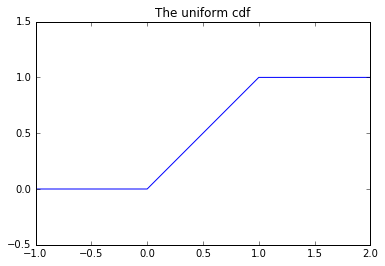

In [8]:
ys = [uniform_cdf(xs[i]) for i in range(len(xs))]
plt.plot(xs, ys)
plt.axis([-1.0, 2.0, -0.5, 1.5])
plt.title("The uniform cdf")
plt.show()

6.6 正規分布

いつもの  
確率密度関数は次の式  
$f(x|\mu,\sigma)=\frac{1}{\sigma \sqrt{2\pi}}exp(-\frac{(x-\mu)^2}{2\sigma^2})$

In [9]:
import math
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x-mu)**2/2/sigma**2)/(sqrt_two_pi*sigma))

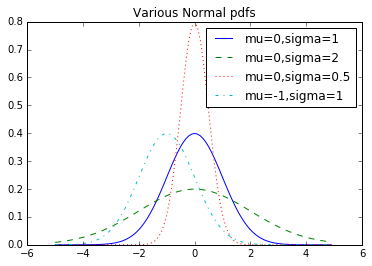

In [10]:
xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label="mu=0,sigma=1")
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label="mu=0,sigma=2")
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label="mu=0,sigma=0.5")
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label="mu=-1,sigma=1")
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

$\mu=0,\sigma=1$の場合を標準正規分布と呼ぶ。$Z$が標準正規分布に従う確率変数であった場合、  
$X=\sigma Z+\mu$  
の確率変数$X$は平均$\mu$、標準偏差$\sigma$の正規分布となる  
逆にXが平均$\mu$、標準偏差$\sigma$の正規分布に従う確率変数であるなら、  
$Z=(X-\mu)/\sigma$  
$Z$は標準正規分布に従う

In [11]:
def normal_cdf(x, mu=0, sigma=1):
    return (1+math.erf((x-mu)/math.sqrt(2)/sigma))/2

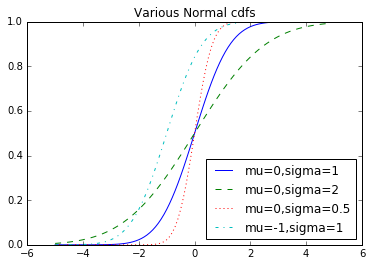

In [12]:
xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs, [normal_cdf(x, sigma=1)  for x in xs], '-', label="mu=0,sigma=1")
plt.plot(xs, [normal_cdf(x, sigma=2)  for x in xs], '--', label="mu=0,sigma=2")
plt.plot(xs, [normal_cdf(x, sigma=0.5)  for x in xs], ':', label="mu=0,sigma=0.5")
plt.plot(xs, [normal_cdf(x, mu=-1)  for x in xs], '-.', label="mu=-1,sigma=1")
plt.legend(loc=4) #凡例は右下
plt.title("Various Normal cdfs")
plt.show()

In [13]:
def inverse_normal_cdf(p, mu=0, sigma=1, tol=0.00001):
    """二分探索を用いて逆関数の近似値を計算する"""
    
    #標準正規分布でない場合、標準正規分布からの差分を求める
    if mu != 0 or sigma != 1 :
        return mu + sigma * inverse_normal_cdf(p, tol = tol)
    
    low_z, low_p = -10.0, 0 #normal_cdf(-10)は0に近い値である
    hi_z, hi_p = 10.0, 1 #normal_cdf(10)は1に近い値である
    while hi_z - low_z > tol:
        mid_z = (low_z+hi_z)/2
        mid_p = normal_cdf(mid_z)
        
        if mid_p < p:
            #中央値はまだ小さいので、さらに上を使う
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            #中央値はまだ大きいので、さらに下を使う
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
    return mid_z

In [14]:
inverse_normal_cdf(0.9)

1.2815570831298828

6.7 中心極限定理

非常に多数の独立で同一の分布に従う確率変数の平均として定義される確率変数は、おおよそ正規分布になる、というもの  
平均$\mu$、標準偏差$\sigma$の確率変数$x_1,...,x_n$があるとする。このとき  
$\frac{1}{n}(x_1+...+x_n)$  
はおおよそ平均$\mu$、標準偏差$\sigma/\sqrt{n}$の正規分布となる

次の式は平均0、標準偏差1の正規分布  
$\frac{(x_1+...+x_n)-\mu n}{\sigma \sqrt{n}}$

これを説明するには、nとpで表される二項確率変数を確認する。確率pで1、(1-p)で0となるn個の独立した確率変数Bernoulli(p)を合計したものがBernoulli(n, p)確率変数。

In [15]:
import random
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

In [16]:
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [17]:
from collections import Counter
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    
    #二項分布を棒グラフでプロットする
    histogram = Counter(data)
    plt.bar([x-0.4 for x in histogram.keys()],
           [v/num_points for v in histogram.values()],
           0.8,
           color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p *(1-p))
    
    xs = range(min(data), max(data)+1)
    ys = [normal_cdf(i+0.5,mu,sigma)-normal_cdf(i-0.5,mu,sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs Normal Approximation")
    plt.show()

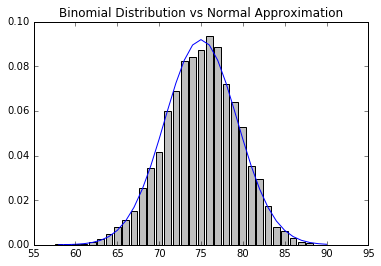

In [18]:
make_hist(0.75,100,10000)

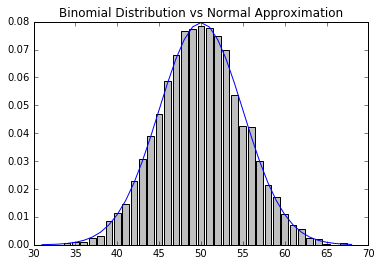

In [19]:
make_hist(0.5,100,10000)

ちゃんとした復習

様々な値を確率的にとる変数を確率変数（random variable）という  
  
確率変数$X$が離散的な値を取る時、$X$を離散確率変数という。  
$X$がある値$x$をとる確率を表した関数$f(x)=Pr(X=x)$を確率関数という  
$0\leq f(x)\leq1,\sum_xf(x)=1$